# import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import re

import panel as pn
import holoviews as hv
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
%matplotlib inline

# load dataset and overview data

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Column1,dien_tich,huong_ban_cong,phong_ngu,ten_thanh_pho,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,project_name,ten_duong,do_rong_duong,do_rong_duong_ml,ten_phuong,type,customer_classification,tinh_trang_noi_that
0,6,6,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,nội thất cao cấp,...,990.0,20.625000,không có,Đường Vĩnh Phúc,0.0,không rõ ml,Phường Vĩnh Phúc,aparment,tầm thấp,nội thất cao cấp
1,11,11,50.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,530.0,10.600000,không có,Phố Liễu Giai,0.0,không rõ ml,Phường Liễu Giai,aparment,tầm thấp,nội thất cao cấp
2,18,18,52.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,1100.0,21.153846,không có,Phố Liễu Giai,0.0,không rõ ml,Phường Liễu Giai,aparment,tầm thấp,nội thất cao cấp
3,30,30,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,520.0,10.833333,không có,Đường Đội Cấn,0.0,không rõ ml,Phường Đội Cấn,aparment,tầm thấp,nội thất cao cấp
4,32,32,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,520.0,10.833333,không có,Đường Đội Cấn,0.0,không rõ ml,Phường Đội Cấn,aparment,tầm thấp,nội thất cao cấp


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59914 entries, 0 to 59913
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               59914 non-null  int64  
 1   Column1                  59914 non-null  int64  
 2   dien_tich                59914 non-null  float64
 3   huong_ban_cong           59914 non-null  object 
 4   phong_ngu                59914 non-null  int64  
 5   ten_thanh_pho            59914 non-null  object 
 6   ten_quan                 59914 non-null  object 
 7   so_tang                  59914 non-null  int64  
 8   mat_tien                 59914 non-null  float64
 9   noi_that                 59914 non-null  object 
 10  huong_nha                59914 non-null  object 
 11  so_do                    59914 non-null  object 
 12  gia                      59914 non-null  float64
 13  gia_m2                   59914 non-null  float64
 14  project_name          

In [5]:
df.isna().sum()

Unnamed: 0                 0
Column1                    0
dien_tich                  0
huong_ban_cong             0
phong_ngu                  0
ten_thanh_pho              0
ten_quan                   0
so_tang                    0
mat_tien                   0
noi_that                   0
huong_nha                  0
so_do                      0
gia                        0
gia_m2                     0
project_name               0
ten_duong                  0
do_rong_duong              0
do_rong_duong_ml           0
ten_phuong                 0
type                       0
customer_classification    0
tinh_trang_noi_that        0
dtype: int64

In [6]:
df['customer_classification'].unique()

array(['tầm thấp', 'tầm trung', 'tầm cao'], dtype=object)

In [7]:
df['tinh_trang_noi_that'].unique()

array(['nội thất cao cấp', 'cơ bản'], dtype=object)

In [8]:
df.shape

(59914, 22)

In [9]:
df.describe()

,Unnamed: 0,Column1,dien_tich,phong_ngu,so_tang,mat_tien,gia,gia_m2,do_rong_duong
count,59914.00000,59914.00000,59914.000000,59914.000000,59914.000000,59914.000000,59914.000000,59914.000000,59914.0
mean,25797.26014,25797.26014,70.661883,2.841790,1.382315,0.781798,6813.287800,102.525768,0.0
std,16147.18269,16147.18269,29.116448,1.383497,2.276069,1.865064,7457.292524,105.636183,0.0
min,3.00000,3.00000,1.000000,1.000000,0.000000,0.000000,0.001000,0.000009,0.0
25%,13041.25000,13041.25000,49.000000,2.000000,0.000000,0.000000,2050.000000,28.750000,0.0
50%,23576.00000,23576.00000,65.300000,3.000000,0.000000,0.000000,3650.000000,50.000000,0.0
75%,35471.50000,35471.50000,88.000000,4.000000,4.000000,0.000000,8600.000000,148.837209,0.0
max,62842.00000,62842.00000,178.000000,6.000000,10.000000,12.000000,37999.000000,593.333333,0.0


# data interpretation

## which is variabel target ??
- a variable target is 'gia' 

## how many row and columns ??
- rows : 91312
- columns: 24

## How many qualitative and quantitative variable is there ? 
   - quantitative is 13
     * type of all 13 qualitative variables are strings.
   -  quantitative variable is 11
      * 3 discete quantitative variables (type int64) & 8 continuous quantitative variables (type float64).


## Percentage of missing values per column ?
  -  refer to step1_cleaning.ipynb for details

In [10]:
apartment = df.loc[df['type'] == 'aparment', :]
land = df.loc[df['type'] == 'land', :]
road = df.loc[df['type'] == 'road surface', :]

# <b> PRODUCT</b>

# types house at Ha Noi city

In [11]:
typeHouse = df['type'].value_counts()

In [12]:

typeHouse.values

array([25786, 23067, 11061], dtype=int64)

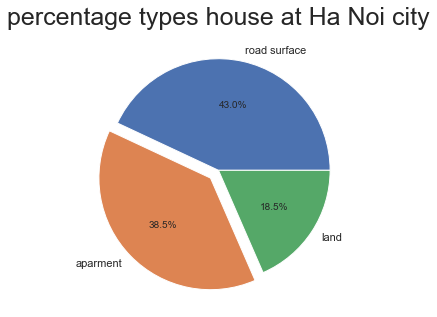

In [13]:
plt.figure(figsize = (5,15))

plt.title('percentage types house at Ha Noi city', fontsize = 25)
# explode the wedge for Small
explode = [0, 0.1, 0]


plt.pie(typeHouse.values, labels = typeHouse.index, autopct="%1.1f%%",
        explode=explode,
       )
plt.show()

## numbers of rooms by product house

In [14]:
df.columns

Index(['Unnamed: 0', 'Column1', 'dien_tich', 'huong_ban_cong', 'phong_ngu',
       'ten_thanh_pho', 'ten_quan', 'so_tang', 'mat_tien', 'noi_that',
       'huong_nha', 'so_do', 'gia', 'gia_m2', 'project_name', 'ten_duong',
       'do_rong_duong', 'do_rong_duong_ml', 'ten_phuong', 'type',
       'customer_classification', 'tinh_trang_noi_that'],
      dtype='object')

In [15]:
rooms = df[['type', 'dien_tich', 'phong_ngu']].sort_values(by = 'dien_tich')

In [16]:
rooms[rooms.duplicated() == False]

,type,dien_tich,phong_ngu
29964,land,1.000,1
18688,aparment,1.000,2
26064,land,1.037,1
25711,land,1.040,1
24118,land,1.046,1
...,...,...,...
59261,road surface,176.000,4
30970,land,176.000,1
40214,road surface,177.000,4
57281,road surface,178.000,4


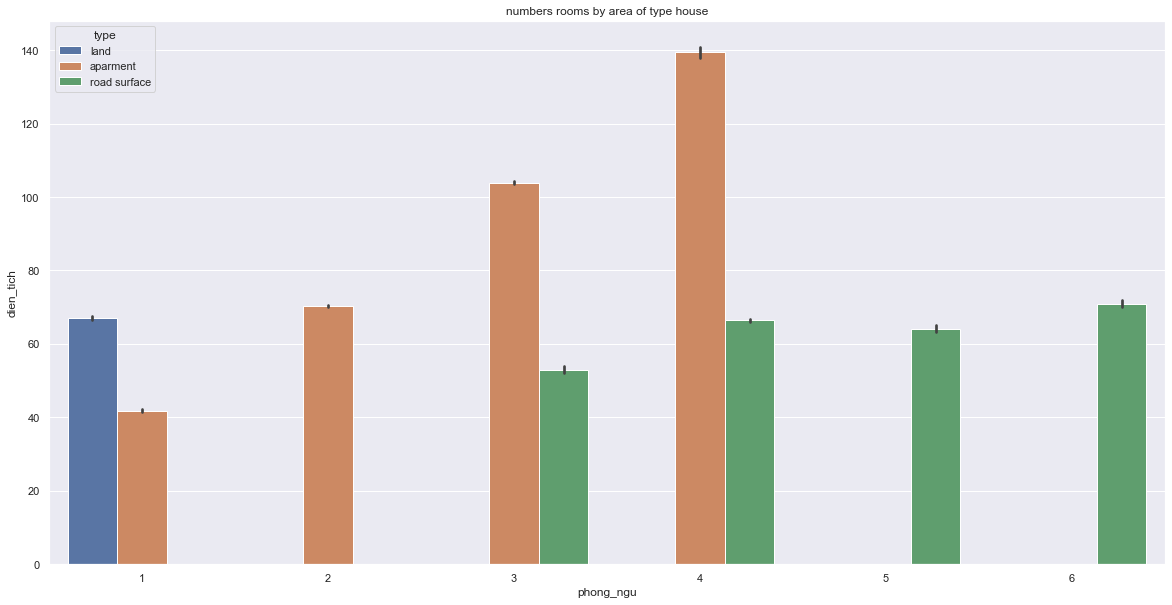

In [17]:
plt.figure(figsize = (20,10))
plt.title('numbers rooms by area of type house')
sns.barplot(data = rooms, x = 'phong_ngu', y = 'dien_tich', hue = 'type')
plt.show()

# <b>Price</b>

## average price house of type house

In [18]:
priceAverage = df[['type', 'gia', 'gia_m2']].groupby('type').mean().reset_index()

In [19]:
priceAverage 

,type,gia,gia_m2
0,aparment,2408.542618,29.798330
1,land,2826.235963,45.639944
2,road surface,12463.836061,191.985859


+ we can see the type of apartment has the lowest price. so it's fit students and office staff

## number of rooms by price of type house

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


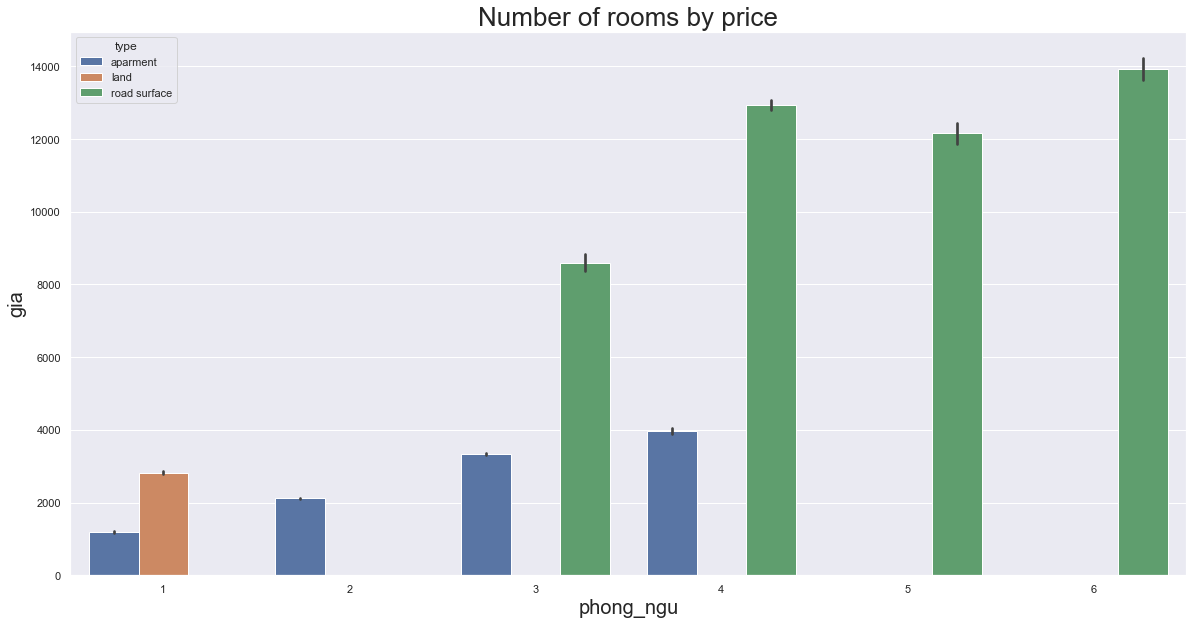

In [20]:
plt.figure(figsize = (20,10))


x = df['phong_ngu']

plt.title("Number of rooms by price", fontsize = 26)
plt.xlabel('phong_ngu', fontsize = 20)
plt.ylabel('gia', fontsize = 20);

# plt.hist(x)
sns.barplot(x, df['gia'], hue=df['type'])
plt.show()

In [21]:
df.loc[df['type'] == 'land', ['phong_ngu', 'gia']]['phong_ngu'].unique()

array([1], dtype=int64)

## price of type house by area

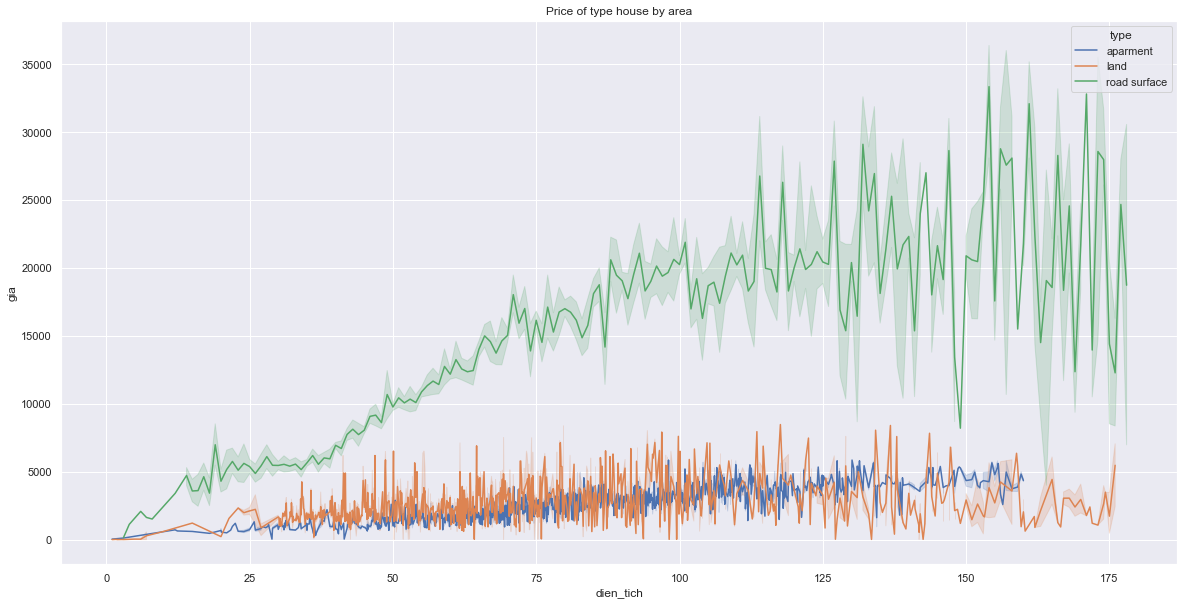

In [22]:
plt.figure(figsize = (20, 10))
plt.title('Price of type house by area')
sns.lineplot(data = df, x = 'dien_tich', y = 'gia', hue = 'type')
plt.show()

## price of customer_classification by area

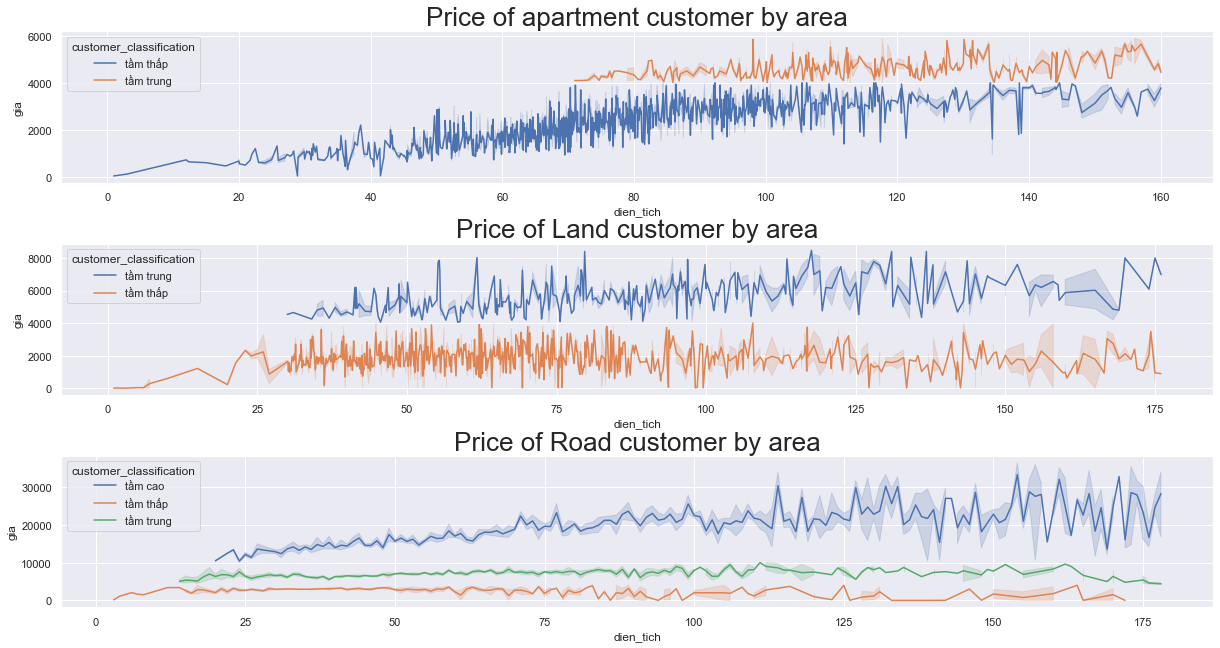

In [23]:
plt.figure(figsize = (20, 10))
plt.subplot(3,1,1)
plt.title('Price of apartment customer by area', fontsize = 26)
sns.lineplot(data = apartment, x = 'dien_tich', y = 'gia', hue = 'customer_classification')
plt.subplot(3,1,2)
plt.title('Price of Land customer by area', fontsize = 26)
sns.lineplot(data = land, x = 'dien_tich', y = 'gia', hue = 'customer_classification')
plt.subplot(3,1,3)
plt.title('Price of Road customer by area', fontsize = 26)
sns.lineplot(data = road, x = 'dien_tich', y = 'gia', hue = 'customer_classification')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## average price apartment at district

In [24]:

apartmentGroup = apartment.groupby(['ten_quan'])['gia'].mean().reset_index()
apartmentGroup = apartmentGroup.sort_values(by = 'gia')


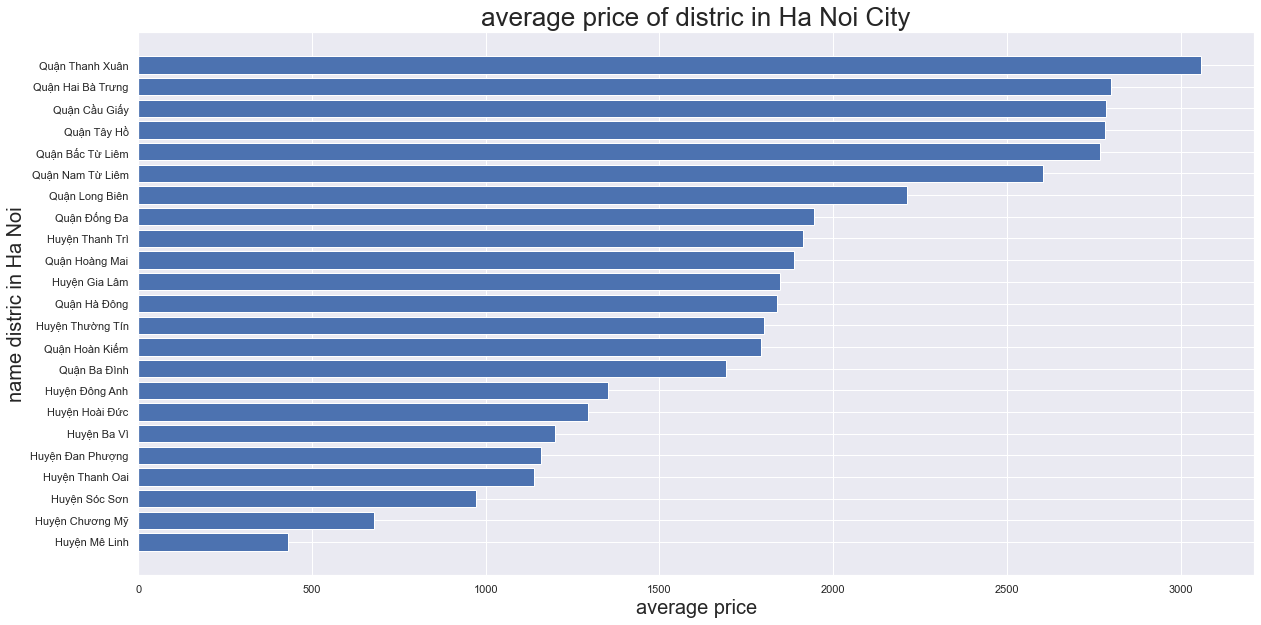

In [25]:
plt.figure(figsize=(20,10))
plt.barh(apartmentGroup['ten_quan'], apartmentGroup['gia'])
plt.title("average price of distric in Ha Noi City", fontsize= 26)
plt.xlabel("average price", fontsize = 20)
plt.ylabel("name distric in Ha Noi", fontsize = 20)
plt.show()

## average price apartment at ward

In [26]:
apartmentGroupWard = apartment.groupby('ten_phuong')['gia'].mean().reset_index()
apartmentGroupWard = apartmentGroupWard.sort_values(by = 'gia')
apartmentGroupWard = apartmentGroupWard.head(20)

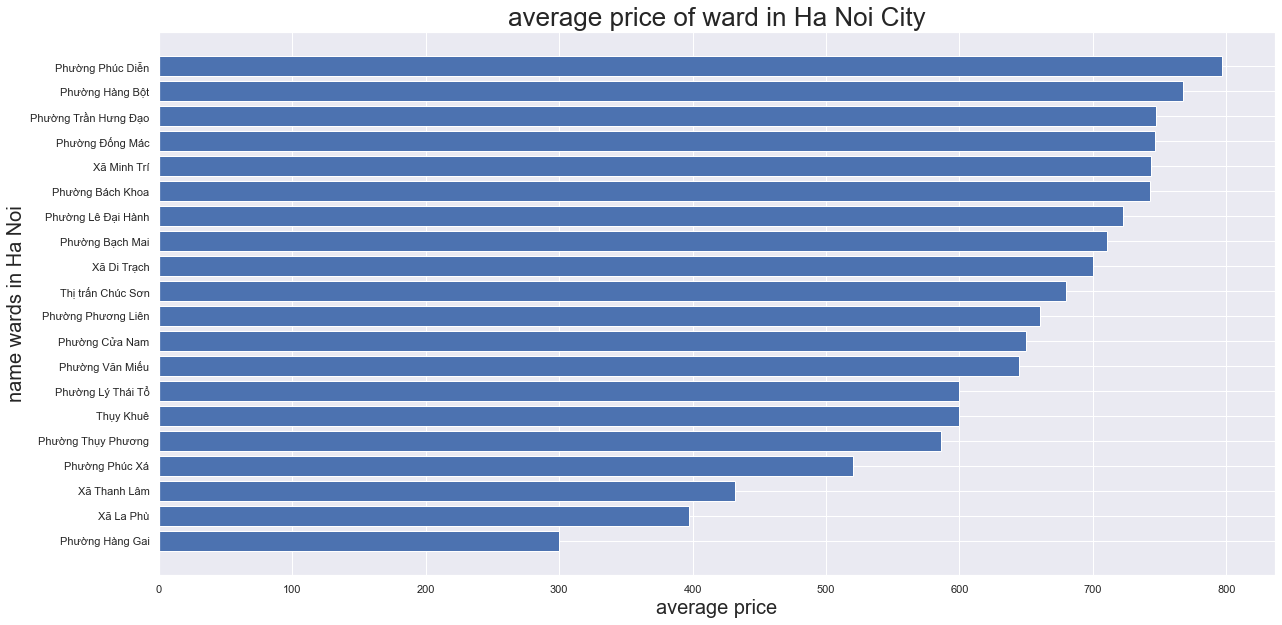

In [27]:
plt.figure(figsize=(20,10))
plt.barh(apartmentGroupWard['ten_phuong'], apartmentGroupWard['gia'])
plt.title("average price of ward in Ha Noi City", fontsize= 26)
plt.xlabel("average price", fontsize = 20)
plt.ylabel("name wards in Ha Noi", fontsize = 20)
plt.show()

## average price apartment at name street

In [28]:
apartmentGroupStreet = apartment.groupby('ten_duong')['gia'].mean().reset_index()
apartmentGroupStreet = apartmentGroupStreet.sort_values(by = 'gia')
apartmentGroupStreet = apartmentGroupStreet.head(20)

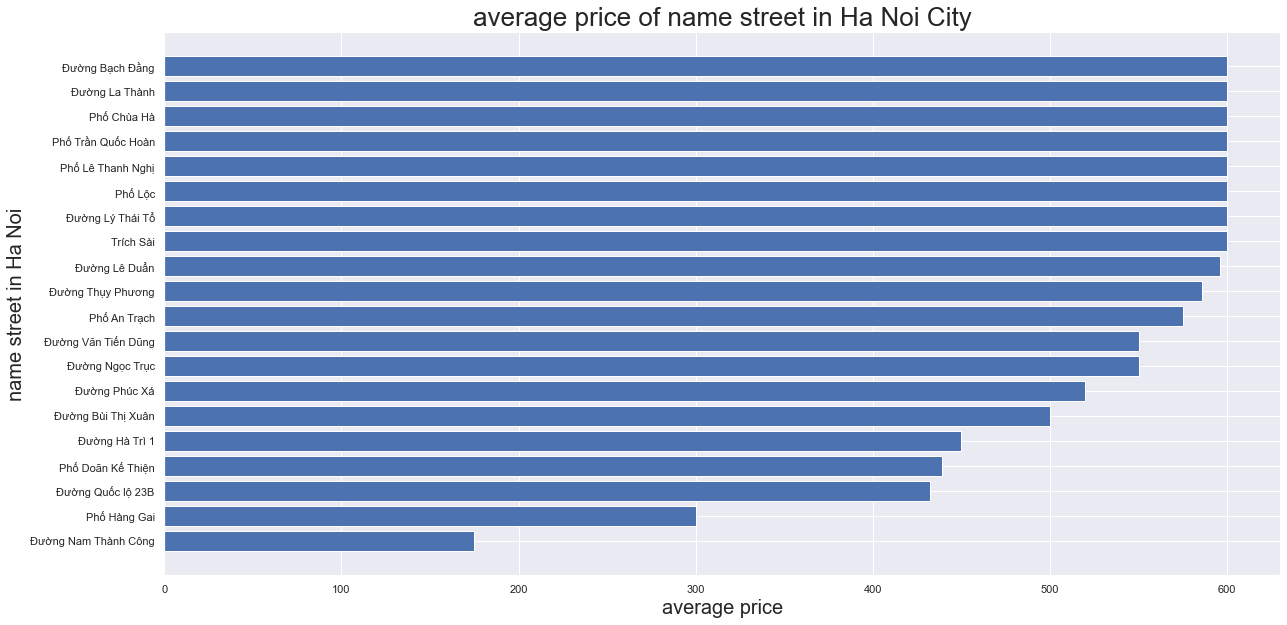

In [29]:
plt.figure(figsize=(20,10))
plt.barh(apartmentGroupStreet['ten_duong'], apartmentGroupStreet['gia'])
plt.title("average price of name street in Ha Noi City", fontsize= 26)
plt.xlabel("average price", fontsize = 20)
plt.ylabel("name street in Ha Noi", fontsize = 20)
plt.show()

In [30]:
df.columns

Index(['Unnamed: 0', 'Column1', 'dien_tich', 'huong_ban_cong', 'phong_ngu',
       'ten_thanh_pho', 'ten_quan', 'so_tang', 'mat_tien', 'noi_that',
       'huong_nha', 'so_do', 'gia', 'gia_m2', 'project_name', 'ten_duong',
       'do_rong_duong', 'do_rong_duong_ml', 'ten_phuong', 'type',
       'customer_classification', 'tinh_trang_noi_that'],
      dtype='object')

In [31]:
df['do_rong_duong_ml'].unique()

array(['không rõ ml', 'Ngõ ngách', 'Ngõ 1 ô tô', 'Mặt phố - Mặt đường'],
      dtype=object)

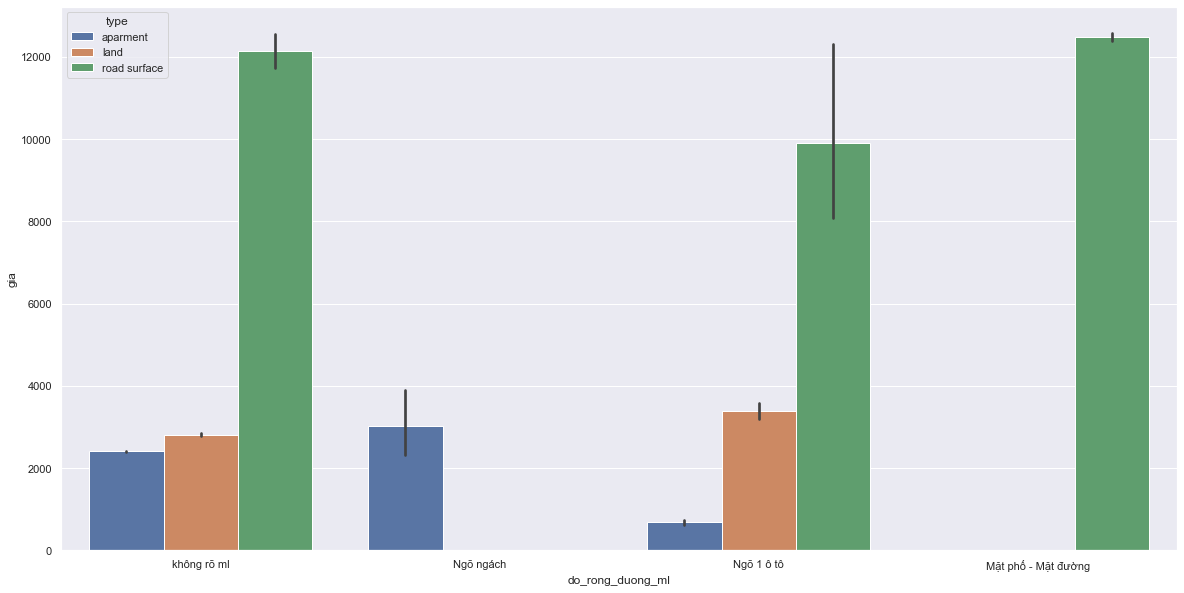

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'do_rong_duong_ml', y = 'gia', hue = 'type')
plt.show()

## average price by customer of type house

In [33]:
customer = df[['type', 'customer_classification', 'gia', 'dien_tich', 'phong_ngu']].groupby(['type', 'customer_classification'])[['gia', 'dien_tich', 'phong_ngu']].mean()

In [34]:
customer

gia   dien_tich  phong_ngu
type         customer_classification                                     
aparment     tầm thấp                  2148.866881   74.297706   2.170795
             tầm trung                 4689.129909  116.141064   2.793469
land         tầm thấp                  1941.909068   63.168716   1.000000
             tầm trung                 5620.562615   79.389131   1.000000
road surface tầm cao                  18936.100241   78.426025   4.267824
             tầm thấp                  2889.032990   43.591075   3.854898
             tầm trung                 6946.361029   54.508250   4.167413

## <b>Place</b>

In [35]:
df.columns

Index(['Unnamed: 0', 'Column1', 'dien_tich', 'huong_ban_cong', 'phong_ngu',
       'ten_thanh_pho', 'ten_quan', 'so_tang', 'mat_tien', 'noi_that',
       'huong_nha', 'so_do', 'gia', 'gia_m2', 'project_name', 'ten_duong',
       'do_rong_duong', 'do_rong_duong_ml', 'ten_phuong', 'type',
       'customer_classification', 'tinh_trang_noi_that'],
      dtype='object')

In [36]:
Place = df[['ten_quan','ten_phuong', 'ten_duong', 'type', 'gia', 'customer_classification', 'do_rong_duong']]

In [37]:
district = Place[['ten_quan', 'type','customer_classification', 'gia']].groupby(['ten_quan', 'type','customer_classification'])['gia'].mean()

In [38]:
district = pd.DataFrame(district).reset_index()

In [39]:
district = district.sort_values(by = 'gia', ascending=False)
idx = district['ten_quan'].str.contains(r'Huyện|Thị xã', flags=re.IGNORECASE, regex=True, na=False)
district1 = district.loc[idx == False, :] 

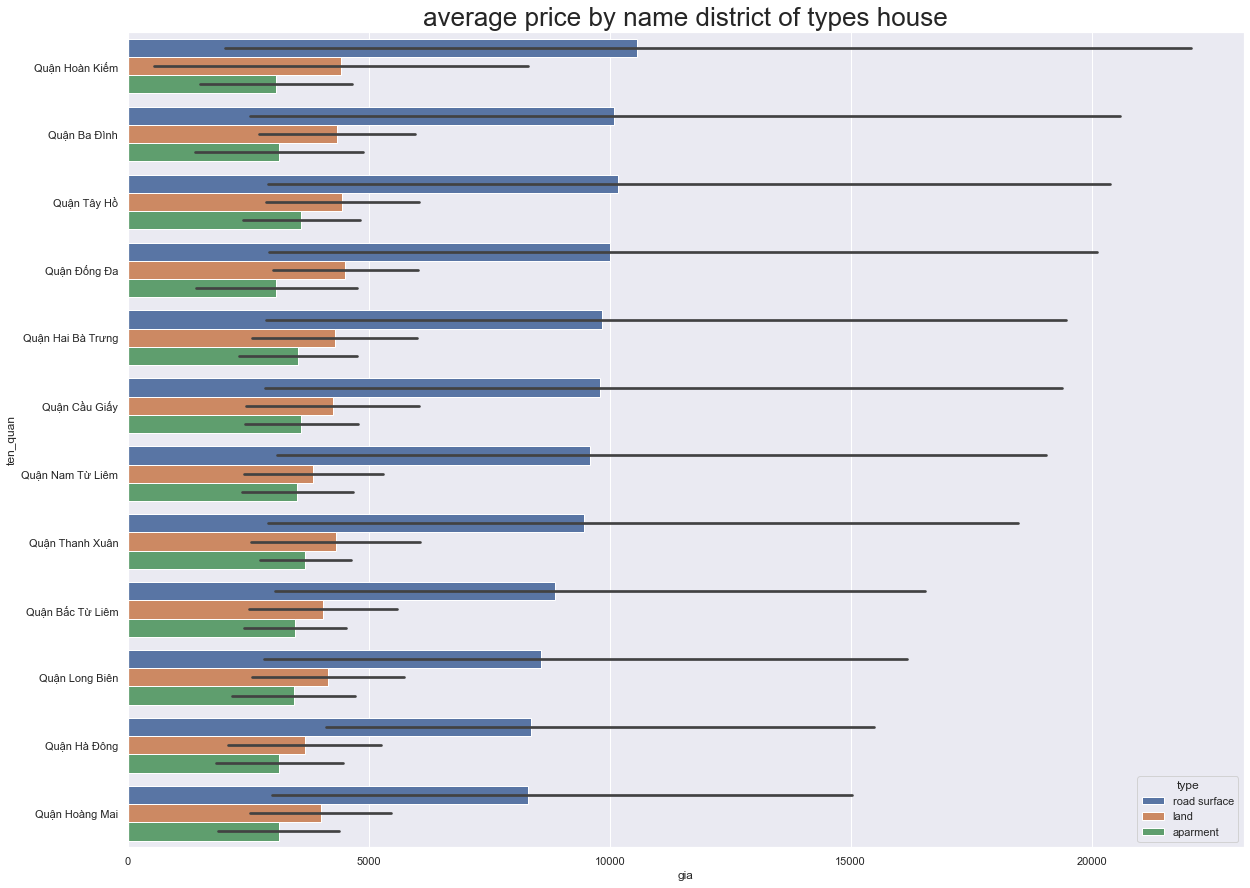

In [40]:
plt.figure(figsize = (20,15))
plt.title('average price by name district of types house', fontsize = 26)
sns.barplot(data = district1, x = 'gia', y = 'ten_quan', hue = 'type')
plt.show()

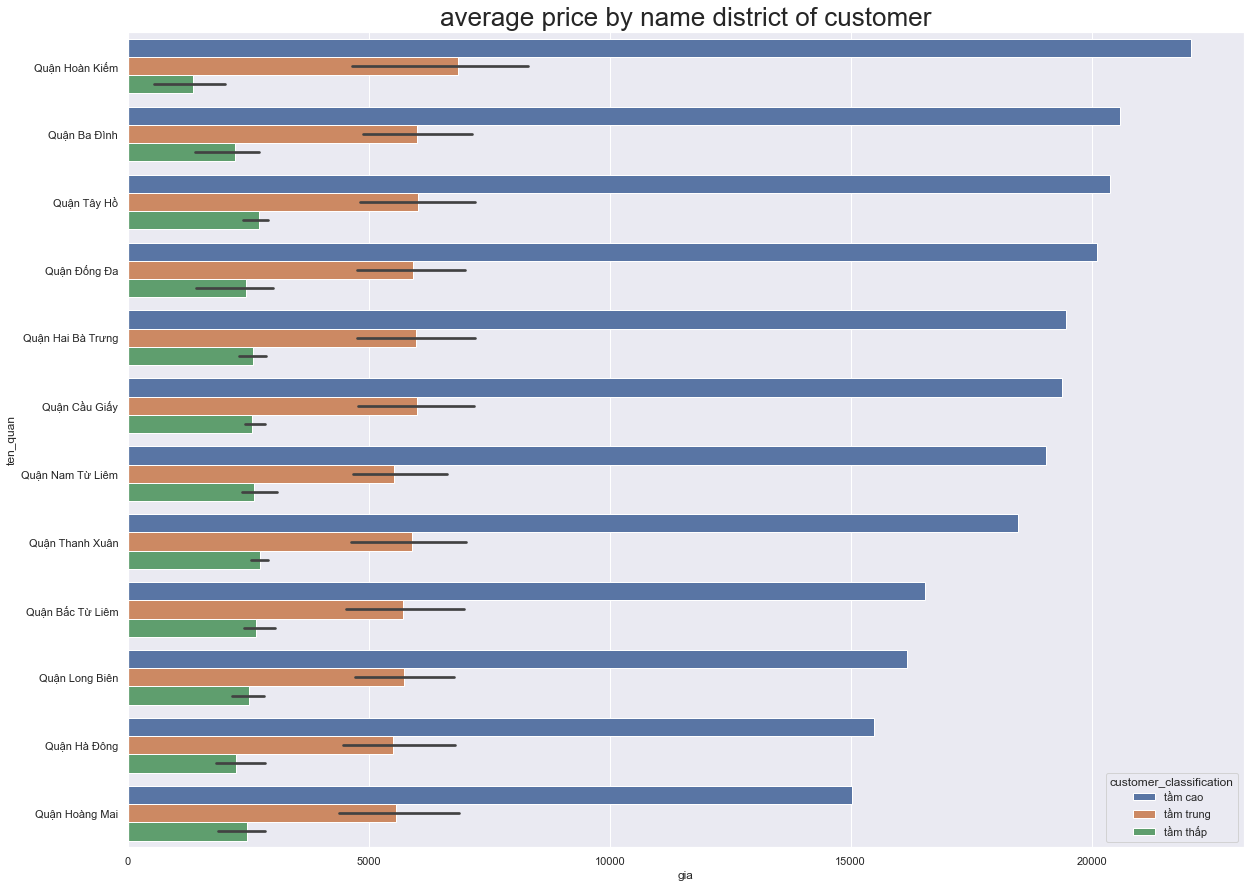

In [41]:
plt.figure(figsize = (20,15))
plt.title('average price by name district of customer', fontsize = 26)
sns.barplot(data = district1, x = 'gia', y = 'ten_quan', hue = 'customer_classification')
plt.show()

# BUILD DASHBOARD

In [42]:
Price = pn.widgets.FloatSlider(name="Price", start=df['gia'].min(), end=df['gia'].max(), value=1000)
Area = pn.widgets.FloatSlider(name="Area", start=df['dien_tich'].min(), end=df['dien_tich'].max())
#combox
cols = list(df['type'].unique())
typeHouse = pn.widgets.Select(name='Type house', options=cols, value='bill_depth_mm')
# classification customer
customers = list(df['customer_classification'].unique())
customer = pn.widgets.Select(name='Customer classification', options=customers, value='tầm thấp')
# classification customer
Furnitures = list(df['tinh_trang_noi_that'].unique())
Furniture = pn.widgets.Select(name='Furniture', options=customers)
# title
title = pn.pane.Markdown("# Giới thiệu")
# columns
clName = list(['ten_quan', 'ten_phuong', 'ten_duong'])
colsA = pn.widgets.Select(name='Ardess', options=clName, value='ten_quan')

In [79]:
# scatter
@pn.depends(Price=Price, Area=Area, typeHouse = typeHouse)
def scatter(Price, Area, typeHouse):
    ds = df.loc[(df['gia'] <= Price) & (df['type'] == typeHouse), :]
    scatter = hv.Scatter(ds, 'dien_tich', 'gia')
    scatter.opts( height=400, width=500)
    return scatter
# barchart
@pn.depends(typeHouse = typeHouse, colsA= colsA)
def barchart(typeHouse, colsA):
    df1 = df.loc[df['type'] == typeHouse, :].groupby(colsA)['gia'].mean()
    df1 = df1.reset_index()
    df1 = df1.sort_values(by = 'gia', ascending=True)
    df1 = df1.head(10)
    barh = hv.Bars(df1, colsA, 'gia')
    barh.opts(invert_axes=True,height = 350, width = 500)
    return barh
# # linechar
@pn.depends( typeHouse = typeHouse)
def linechart(typeHouse):
    dfs = df.loc[df['type'] == typeHouse, :]
    dfs = dfs.groupby('dien_tich')['gia'].mean()
    dfs = dfs.reset_index()
    line = hv.Curve(dfs, 'dien_tich', 'gia')
    line.opts( height=300, width=450, line_width = 1)
    return line

@pn.depends(Price=Price, typeHouse = typeHouse, customer = customer)
def table(Price, typeHouse, customer):
    ds = df.loc[(df['gia'] <= Price) & (df['type'] == typeHouse), ['dien_tich','phong_ngu','ten_quan', 'gia', 'customer_classification' ]]
    ds = ds.head(5)
    return ds

In [80]:
from panel.template import DarkTheme

dark_material = pn.template.MaterialTemplate(title='DashBoard price house', theme=DarkTheme)
dark_material.sidebar.append(title)
dark_material.sidebar.append(typeHouse)
dark_material.sidebar.append(customer)
dark_material.sidebar.append(colsA)
dark_material.sidebar.append(Furniture)
dark_material.sidebar.append(Price)
dark_material.sidebar.append(Area)

dark_material.main.append(
    pn.Row(
        pn.Card(hv.DynamicMap(scatter), title='scatter'),
        pn.Card(hv.DynamicMap(barchart), title='Barchart')
    )
),
dark_material.main.append(
    pn.Row(
        pn.Card(table, title='table', width = 500),
        pn.Card(hv.DynamicMap(linechart), title='line chart', width = 500)
    )
)
dark_material.show()

Launching server at http://localhost:54807


Callback failed for object named "Type house" changing property {'value': 'land'} 
Traceback (most recent call last):
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\reactive.py", line 276, in _process_events
    self.param.update(**self_events)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 1898, in update
    self_._batch_call_watchers()
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 2059, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 2021, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\param.py", line 790, in _replace_pane
    new_object = self.eval(self.object)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\param.py", line 773, in eval
    return function(*args, **kwargs)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-package

Callback failed for object named "Type house" changing property {'value': 'aparment'} 
Traceback (most recent call last):
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\reactive.py", line 276, in _process_events
    self.param.update(**self_events)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 1898, in update
    self_._batch_call_watchers()
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 2059, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\param\parameterized.py", line 2021, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\param.py", line 790, in _replace_pane
    new_object = self.eval(self.object)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-packages\panel\param.py", line 773, in eval
    return function(*args, **kwargs)
  File "C:\Users\FPTSHOP\anaconda3\lib\site-pac

C:\Users\FPTSHOP\anaconda3\lib\site-packages\bokeh\document\document.py:435: RuntimeWarning: coroutine 'WSHandler.send_message' was never awaited
  gc.collect()
